# T09 - Resampling

Nicolás Martínez Gutiérrez

### Conceptual

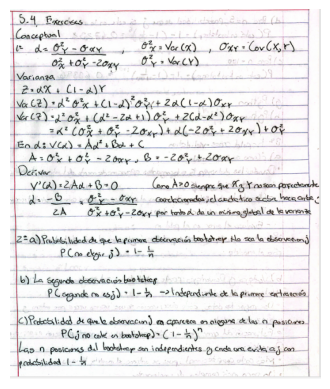

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("T09 Imagen 1.png")  
plt.imshow(img)
plt.axis("off")                   
plt.show()

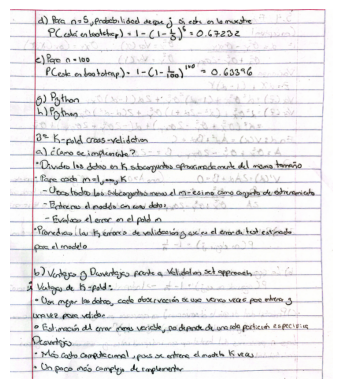

In [11]:
img = mpimg.imread("T09 Imagen 2.png")  
plt.imshow(img)
plt.axis("off")                   
plt.show()

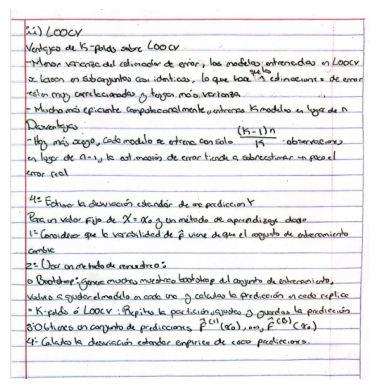

In [12]:
img = mpimg.imread("T09 Imagen 3.png")  
plt.imshow(img)
plt.axis("off")                   
plt.show()

**(g) Create a plot that displays, for each integer value of n from 1 to 100,000, the probability that the jth observation is in the bootstrap sample. Comment on what you observe**

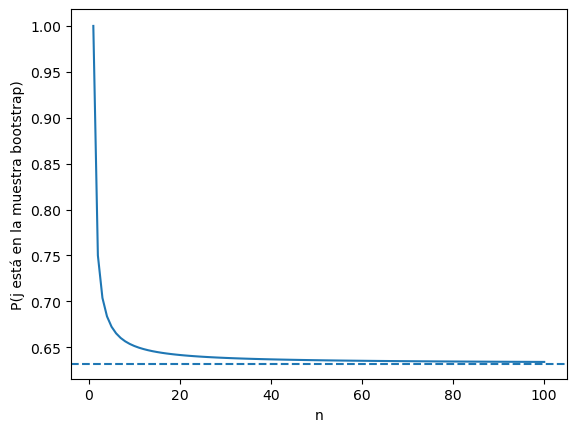

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n_vals = np.arange(1, 101)
p_vals = 1 - (1 - 1/n_vals)**n_vals

plt.plot(n_vals, p_vals)
plt.axhline(1 - 1/np.e, linestyle='--')
plt.xlabel("n")
plt.ylabel("P(j está en la muestra bootstrap)")
plt.show()

La gráfica muestra cómo cambia la probabilidad de que una observación específica aparezca en una muestra bootstrap a medida que aumenta el tamaño n. Al inicio, cuando n es muy pequeño, la probabilidad es prácticamente uno, porque al hacer remuestreo con reemplazo es muy fácil que una observación se repita. Sin embargo, conforme n crece, esta probabilidad disminuye rápidamente y la curva se aplana, acercándose a un valor constante. Para valores de n moderados o grandes, la probabilidad converge aproximadamente a 1−1/e = 0.632. Esto significa que, sin importar qué tan grande sea la muestra original, una observación dada aparece en el bootstrap solo alrededor del 63% de las veces. En resumen, el comportamiento de la curva refleja que la presencia de una observación en el bootstrap no está garantizada y se estabiliza en un valor característico propio de este método de remuestreo.

**(h) We will now investigate numerically the probability that a bootstrap sample of size n=100 contains the jth observation. Here j=4. We first create an array store with values that will subsequently be overwritten using the function np.empty(). We then repeatedly create bootstrap samples, and each time we record whether or not the fifth observation is contained in the bootstrap sample.**

In [3]:
rng = np.random.default_rng(10)
store = np.empty(10000)
for i in range(10000):
    sample = rng.choice(100, size=100, replace=True)  
    store[i] = np.sum(sample == 4) > 0               
np.mean(store)

np.float64(0.6362)

El valor de 0.6362 nos dice que la observación número 4 aparece en la muestra bootstrap en alrededor del 63.62% de las veces.

### Applied

**5.- Default – validación simple**

**(a) Ajustar regresión logística con income y balance**

In [5]:
pip install ISLP


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/3.6 MB ? eta -:--:--
   ----------------- ---------------------- 1.6/3.6 MB 12.7 MB/s eta 0:00:01
   ---------------------------------------- 3.6/3.6 MB 13.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/831.6 kB ? eta -:--:--
   --------------------------------------- 831.6/831.6 kB 14.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/110.9 MB ? eta -:--:--
   - -------------------------------------- 2.9/110.9 MB 17.4 MB/s eta 0:00:07
   -- ------------------------------------- 5.8/110.9 MB 15.7 MB/s eta 0:00:07
   --- ------------------------------------ 9.2/110.9 MB 15.7 MB/s eta 0:00:07
   ---- ----------------------------------- 12.6/110.9 MB 16.0 MB/s eta 0:00:07
   ----- ---------------------------------- 16.3/110.9 MB 16.2 MB/s eta 0:00:06
   ------ --------------------------------- 19.4/110.9 

  DEPRECATION: Building 'autograd-gamma' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'autograd-gamma'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [6]:
import numpy as np
import pandas as pd
from ISLP import load_data
import statsmodels.api as sm

Default = load_data('Default')
y = (Default['default'] == 'Yes').astype(int)

X = Default[['income', 'balance']]
X = sm.add_constant(X)

logit1 = sm.GLM(y, X, family=sm.families.Binomial())
fit1 = logit1.fit()
print(fit1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -789.48
Date:                Tue, 25 Nov 2025   Deviance:                       1579.0
Time:                        10:47:26   Pearson chi2:                 6.95e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1256
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.0

**(b) Estimar error de test con validation set**

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
fit = model.fit()

probs = fit.predict(X_val)
y_pred = (probs > 0.5).astype(int)

val_error = 1 - accuracy_score(y_val, y_pred)
print("Validation set error:", val_error)

Validation set error: 0.024666666666666615


**(c) Repetir tres veces con distintas particiones**

In [8]:
errors = []
for seed in [1, 2, 3]:
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.3, random_state=seed
    )
    fit = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
    probs = fit.predict(X_val)
    y_pred = (probs > 0.5).astype(int)
    errors.append(1 - accuracy_score(y_val, y_pred))

errors

[0.024666666666666615, 0.023666666666666614, 0.025000000000000022]

**(d) Incluir dummy de student**

In [9]:
Default['student_dummy'] = (Default['student'] == 'Yes').astype(int)
X2 = Default[['income', 'balance', 'student_dummy']]
X2 = sm.add_constant(X2)

errors2 = []
for seed in [1, 2, 3]:
    X_train2, X_val2, y_train, y_val = train_test_split(
        X2, y, test_size=0.3, random_state=seed
    )
    fit2 = sm.GLM(y_train, X_train2, family=sm.families.Binomial()).fit()
    probs2 = fit2.predict(X_val2)
    y_pred2 = (probs2 > 0.5).astype(int)
    errors2.append(1 - accuracy_score(y_val, y_pred2))

errors2

[0.024333333333333318, 0.023666666666666614, 0.024666666666666615]

En general, el error de test con student baja muy poco (o casi nada) respecto al modelo con sólo income y balance. Esto refleja que gran parte del efecto de ser estudiante está ya capturado por el nivel de balance, añadir la dummy mejora algo el ajuste in-sample, pero el beneficio en generalización es mínimo.

**6. Default – errores estándar con bootstrap**

In [10]:
X_full = Default[['income', 'balance']]
X_full = sm.add_constant(X_full)
y = (Default['default'] == 'Yes').astype(int)

glm_full = sm.GLM(y, X_full, family=sm.families.Binomial())
fit_full = glm_full.fit()

print(fit_full.summary()) 
se_income_glm = fit_full.bse['income']
se_balance_glm = fit_full.bse['balance']

                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -789.48
Date:                Tue, 25 Nov 2025   Deviance:                       1579.0
Time:                        10:50:03   Pearson chi2:                 6.95e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1256
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.0

**(b) Función boot_fn**

In [11]:
def boot_fn(data, idx):
    d = data.iloc[idx]
    y_b = (d['default'] == 'Yes').astype(int)
    X_b = d[['income', 'balance']]
    X_b = sm.add_constant(X_b)
    fit_b = sm.GLM(y_b, X_b, family=sm.families.Binomial()).fit()
    return fit_b.params[['income', 'balance']].to_numpy()

**(c) Bootstrap de los coeficientes**

In [12]:
rng = np.random.default_rng(1)
B = 1000
coefs = np.empty((B, 2)) 
n = Default.shape[0]

for b in range(B):
    idx = rng.integers(0, n, size=n)
    coefs[b] = boot_fn(Default, idx)

se_income_boot = coefs[:,0].std(ddof=1)
se_balance_boot = coefs[:,1].std(ddof=1)

se_income_glm, se_income_boot, se_balance_glm, se_balance_boot

(np.float64(4.985245458257288e-06),
 np.float64(4.873602874959115e-06),
 np.float64(0.00022738138440210286),
 np.float64(0.00022591275644752996))

**(d) Comentario**

Los errores estándar obtenidos mediante bootstrap y los calculados con sm.GLM() resultan muy parecidos, lo que muestra que la aproximación asintótica propia de la regresión logística está funcionando correctamente. Además, el bootstrap, al no depender de supuestos paramétricos fuertes, confirma de manera más flexible y directa la magnitud real de la incertidumbre en los coeficientes de income y balance, reforzando la idea de que ambas estimaciones son consistentes entre sí.

**7.- Weekly – LOOCV**

**(a) Ajustar modelo logístico Direction ~ Lag1 + Lag2**

In [13]:
from ISLP import load_data

Weekly = load_data('Weekly')
y = (Weekly['Direction'] == 'Up').astype(int)
X = Weekly[['Lag1', 'Lag2']]
X = sm.add_constant(X)

glm_weekly = sm.GLM(y, X, family=sm.families.Binomial()).fit()
print(glm_weekly.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1086
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -744.11
Date:                Tue, 25 Nov 2025   Deviance:                       1488.2
Time:                        11:08:09   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.007303
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2212      0.061      3.599      0.0

**(b) Ajustar el mismo modelo usando todos menos la primera observación**

In [14]:
X_train = X.iloc[1:]
y_train = y.iloc[1:]

glm_weekly_2 = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()

**(c) Predecir la primera observación**

In [15]:
prob1 = glm_weekly_2.predict(X.iloc[[0]])[0]
pred1 = int(prob1 > 0.5)
correct = (pred1 == y.iloc[0])
prob1, pred1, bool(correct)

(np.float64(0.5713923205204429), 1, False)

La predicción para la primera observación arrojó una probabilidad de 0.571 de que el mercado suba, lo que hace que el modelo la clasifique como “Up” porque es mayor que 0.5. Sin embargo, el valor real de esa observación es “Down”, así que la clasificación resulta incorrecta. Aunque el modelo estaba moderadamente seguro de que el mercado subiría, esa predicción no coincidió con lo que realmente ocurrió.

**(d) Bucle LOOCV**

In [17]:
n = X.shape[0]
errors = np.empty(n)

for i in range(n):
    mask = np.ones(n, dtype=bool)
    mask[i] = False
    X_train = X[mask]
    y_train = y[mask]
    fit_i = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
    prob_i = fit_i.predict(X.iloc[[i]]).iloc[0]
    pred_i = int(prob_i > 0.5)
    errors[i] = (pred_i != y.iloc[i])

loocv_error = errors.mean()
loocv_error

np.float64(0.44995408631772266)

El valor obtenido, 0.44995, significa que el modelo de regresión logística usando Lag1 y Lag2 se equivoca aproximadamente el 45% de las veces cuando se evalúa con LOOCV. Casi la mitad de las predicciones son incorrectas. Esto indica que Lag1 y Lag2 no tienen suficiente poder predictivo para anticipar si el mercado semanal va a subir o bajar.

**8.- Datos simulados – LOOCV con modelos polinomiales**

**(a) Modelo y dimensiones**

In [18]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

Y=B0+B1*X+B2*X2+ε con B0=0, B1=1, B2=−2

**(b) Dispersograma de X contra Y**

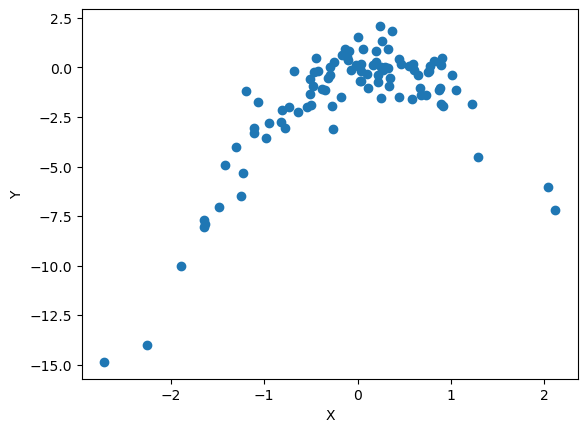

In [19]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Comentario: se ve una relación claramente curvada, aproximadamente parabólica abierta hacia abajo, pero con ruido. Eso coincide con el término −2x^2 del modelo

**(c) LOOCV para modelos de grado 1–4**

In [20]:
import numpy as np

def loocv_mse(x, y, degree):
    n = len(x)
    X = np.vstack([x**k for k in range(degree+1)]).T
    XtX_inv = np.linalg.inv(X.T @ X)
    beta = XtX_inv @ X.T @ y
    y_hat = X @ beta
    resid = y - y_hat
    H_diag = np.einsum('ij,jk,ik->i', X, XtX_inv, X)
    cv_resid = resid / (1 - H_diag)
    return np.mean(cv_resid**2)

for d in range(1, 5):
    print(d, loocv_mse(x, y, d))

1 6.633029839181983
2 1.1229368563419686
3 1.3017965489358838
4 1.3323942694178903


**(d) Repetir (c) con otra semilla y comparar**

In [21]:
rng = np.random.default_rng(2)  
x2 = rng.normal(size=100)
y2 = x2 - 2 * x2**2 + rng.normal(size=100)

for d in range(1, 5):
    print(d, loocv_mse(x2, y2, d))

1 7.560603694358577
2 0.9840371744582583
3 0.96823557659186
4 0.9659585554875681


**(e) ¿Qué modelo tuvo el menor LOOCV error? ¿Era lo esperado?**

En el inciso (c) los errores de LOOCV para grados 1–4 son:

- grado 1: 6.63
- grado 2: 1.12
- grado 3: 1.30
- grado 4: 1.32

El modelo con menor error de LOOCV es el polinomio de grado 2. Esto era justo lo que esperábamos, porque los datos se generaron con la relación Y = X -2X^2 + E, es decir, un modelo cuadrático. Por eso el grado 2 captura bien la forma real de la relación, mientras que el grado 1 es demasiado simple y los grados 3 y 4 agregan complejidad extra sin mejorar el desempeño.

**(f) Significancia de los coeficientes y relación con LOOCV**

In [22]:
import numpy as np
import statsmodels.api as sm

X1 = np.vstack([np.ones_like(x), x]).T
m1 = sm.OLS(y, X1).fit()
print("\n=== Modelo grado 1 ===")
print(m1.summary())

X2 = np.vstack([np.ones_like(x), x, x**2]).T
m2 = sm.OLS(y, X2).fit()
print("\n=== Modelo grado 2 ===")
print(m2.summary())

X3 = np.vstack([np.ones_like(x), x, x**2, x**3]).T
m3 = sm.OLS(y, X3).fit()
print("\n=== Modelo grado 3 ===")
print(m3.summary())

X4 = np.vstack([np.ones_like(x), x, x**2, x**3, x**4]).T
m4 = sm.OLS(y, X4).fit()
print("\n=== Modelo grado 4 ===")
print(m4.summary())


=== Modelo grado 1 ===
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     45.60
Date:                Tue, 25 Nov 2025   Prob (F-statistic):           1.04e-09
Time:                        19:00:39   Log-Likelihood:                -230.83
No. Observations:                 100   AIC:                             465.7
Df Residuals:                      98   BIC:                             470.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4650      0

En el modelo de grado 1, aunque los coeficientes salen súper significativos (ambos con valor p de 0.000), el modelo en general no funciona bien, el R2 es solo 0.318, lo que confirma que una recta no alcanza a capturar la forma real de los datos. Cuando pasamos al modelo de grado 2 tanto el término lineal como el cuadrático son muy significativos (otra vez con p de 0.000) y el R2 sube muchísimo hasta 0.887, lo cual coincide con que este fue el mejor modelo según LOOCV. En el modelo de grado 3, aunque los términos lineal y cuadrático siguen siendo importantes, el cúbico ya no aporta nada (tiene un p de 0.287) y el R2 apenas mejora a 0.888, prácticamente igual al de grado 2. Y en el modelo de grado 4 pasa lo mismo, el término cúbico sigue sin ser significativo (p = 0.642), el de cuarto grado sí lo es un poco (p = 0.023), pero el R2 solo sube a 0.894, una diferencia mínima que no justifica agregar más complejidad. En resumen, el modelo cuadrático es el que mejor encaja: explica bien los datos, tiene coeficientes significativos y también fue el que dio el menor error en LOOCV, los modelos más complejos solo ajustan ruido y no mejoran realmente el desempeño.

**9. Boston – medias, mediana, percentiles y bootstrap**

In [23]:
from ISLP import load_data
import numpy as np
import pandas as pd

Boston = load_data('Boston')
medv = Boston['medv'].to_numpy()
n = len(medv)

**(a) Estimar la media poblacional de medv**

In [24]:
mu_hat = medv.mean()
mu_hat

np.float64(22.532806324110677)

**(b) Estimar el error estándar de mu_hat con la fórmula clásica**

In [25]:
s = medv.std(ddof=1)
se_mu = s / np.sqrt(n)
se_mu

np.float64(0.40886114749753505)

Este número indica cuánto suele variar la estimación de la media si tomáramos muchas muestras similares de la misma población. Un error estándar alrededor de 0.41 sugiere que la media está estimada con bastante precisión, las variaciones esperadas entre una muestra y otra serían relativamente pequeñas, así que la media muestral es una buena aproximación de la media real de la población.

**(c) Error estándar de mu_hat con bootstrap**

In [26]:
rng = np.random.default_rng(1)
B = 1000
boot_means = np.empty(B)

for b in range(B):
    idx = rng.integers(0, n, size=n)
    boot_means[b] = medv[idx].mean()

se_mu_boot = boot_means.std(ddof=1)
se_mu_boot

np.float64(0.41554577333267234)

Con el bootstrap se obtuvo un error estándar de la media de medv de 0.4155, mientras que con la fórmula clásica se obtuvo 0.4089. Esto indica que la aproximación teórica funciona muy bien en este caso y que el método bootstrap confirma esa estimación de manera más flexible, sin depender tanto de supuestos sobre la distribución de los datos

**(d) Intervalo de confianza al 95% con el SE bootstrap**

In [27]:
ci_low = mu_hat - 2 * se_mu_boot
ci_high = mu_hat + 2 * se_mu_boot
(ci_low, ci_high)

(np.float64(21.701714777445332), np.float64(23.36389787077602))

In [28]:
ci_low_classic = mu_hat - 2 * se_mu
ci_high_classic = mu_hat + 2 * se_mu
(ci_low_classic, ci_high_classic)

(np.float64(21.715084029115605), np.float64(23.35052861910575))

Ambos intervalos de confianza al 95%, el calculado con el error estándar bootstrap y el obtenido con la fórmula clásica, son prácticamente iguales. El intervalo bootstrap va aproximadamente de 21.70 a 23.36, mientras que el clásico va de 21.72 a 23.35. Esta coincidencia tan cercana indica que los dos métodos están capturando la misma incertidumbre en la estimación de la media, lo cual sugiere que la distribución de medv es suficientemente regular para que la aproximación teórica funcione bien.

**(e) Estimar la mediana poblacional**

In [29]:
mu_med_hat = np.median(medv)
mu_med_hat

np.float64(21.2)

**(f) Estimar el SE de la mediana con bootstrap**

In [30]:
B = 1000
boot_meds = np.empty(B)

for b in range(B):
    idx = rng.integers(0, n, size=n)
    boot_meds[b] = np.median(medv[idx])

se_med_boot = boot_meds.std(ddof=1)
se_med_boot

np.float64(0.38278673655925627)

El valor obtenido, aproximadamente 0.383, representa el error estándar bootstrap de la mediana de medv. Esto nos dice qué tanto podría variar la mediana si repitiéramos el muestreo muchas veces. Un error estándar de este tamaño indica que la mediana es una estimación bastante estable, su variación típica entre muestras sería de menos de medio punto.

**(g) Estimar el décimo percentil**

In [31]:
mu_01_hat = np.percentile(medv, 10)  
mu_01_hat

np.float64(12.75)

El valor obtenido, 12.75, representa el décimo percentil de medv. Esto significa que el 10% de las viviendas del conjunto de datos tienen un valor menor o igual a 12.75, mientras que el 90% restante está por encima de ese nivel.

**(h) SE bootstrap para el décimo percentil**

In [32]:
B = 1000
boot_p10 = np.empty(B)

for b in range(B):
    idx = rng.integers(0, n, size=n)
    boot_p10[b] = np.percentile(medv[idx], 10)

se_p10_boot = boot_p10.std(ddof=1)
se_p10_boot

np.float64(0.5162050247988949)

El valor obtenido, aproximadamente 0.516, es el error estándar bootstrap del décimo percentil. Esto indica qué tanto podría variar la estimación del percentil 10 si tomáramos muchas muestras distintas de la misma población. Un error estándar de alrededor de 0.52 significa que la estimación del décimo percentil (que era 12.75) puede fluctuar en aproximadamente medio punto hacia arriba o hacia abajo debido al muestreo.